In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [15]:
df['smoker']=lb.fit_transform(df['smoker'])
df['sex']=lb.fit_transform(df['sex'])
df['time']=lb.fit_transform(df['time'])
df['day']=lb.fit_transform(df['day'])

In [19]:
df.dtypes

total_bill    float64
tip           float64
sex             int32
smoker          int32
day             int32
time            int32
size            int64
dtype: object

In [21]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3


In [23]:
df.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


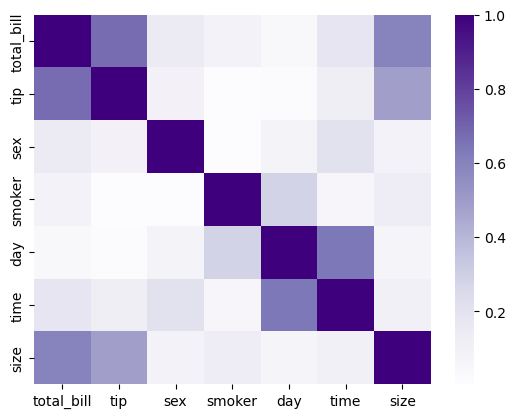

In [25]:
import matplotlib.pyplot as plt
sns.heatmap(np.abs(df.corr()),cmap='Purples')
plt.show()

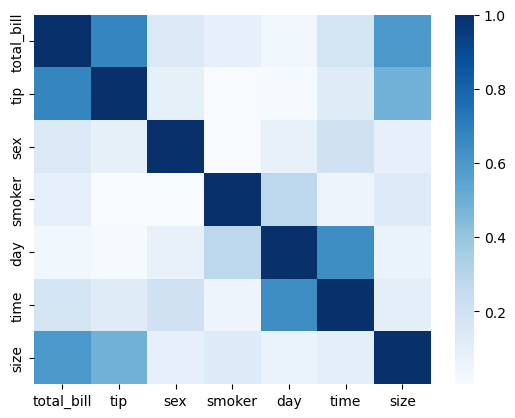

In [29]:
import matplotlib.pyplot as plt
sns.heatmap(np.abs(df.corr()),cmap='Blues')
plt.show()

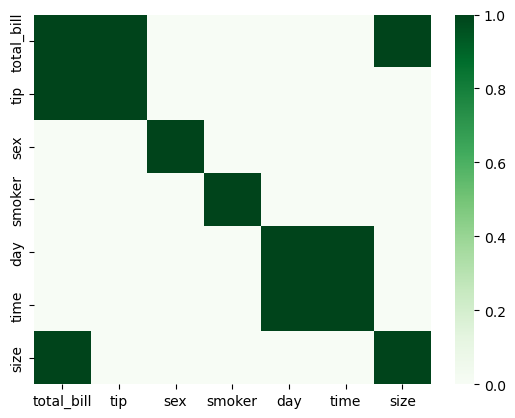

In [31]:
sns.heatmap(np.abs(df.corr())>0.5,cmap='Greens')
plt.show()

In [33]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [37]:
sc_array=sc.fit_transform(df)

In [39]:
sc_array.shape

(244, 7)

In [45]:
df.shape

(244, 7)

In [47]:
sc_df=pd.DataFrame(sc_array,columns=df.columns)
sc_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
